In [1]:
letterR_url = "https://www.google.com/url?sa=i&source=images&cd=&cad=rja&uact=8&ved=2ahUKEwim6rO0q9fgAhVKeKwKHThBAmAQjRx6BAgBEAU&url=https%3A%2F%2Fwww.typoland.cz%2Fen%2Fwooden-letters-black%2F313-wooden-letter-r-black.html&psig=AOvVaw3j1sPP23kUuim1n7lXLS-U&ust=1551199679589930"

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import string

# points a, b and, c
a, b, c, d = (0, 1, 0), (1, 0, 1), (0, -1, 2), (-1, 0, 3)

# matrix with row vectors of points
A = np.array([a, b, c, d])

# 3x3 Identity transformation matrix
I = np.eye(3)

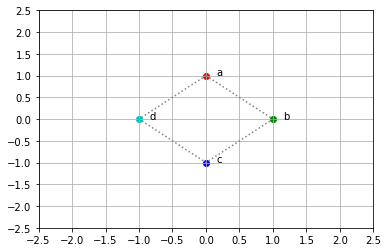

In [35]:
color_lut = 'rgbc'
fig = plt.figure()
ax = plt.gca()
xs = []
ys = []
for row in A:
    output_row = I @ row
    x, y, i = output_row
    
    xs.append(x)
    ys.append(y)
    i = int(i) # convert float to int for indexing
    c = color_lut[i]
    plt.scatter(x, y, color=c)
    plt.text(x + 0.15, y, f"{string.ascii_letters[i]}")
xs.append(xs[0])
ys.append(ys[0])
plt.plot(xs, ys, color="gray", linestyle='dotted')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid()
plt.show()

0 1 0 1
1 0 2 0
0 -1 0 -1
-1 0 -2 0


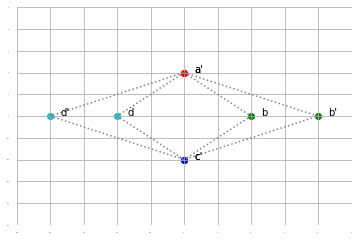

In [99]:
# create the scaling transformation matrix
T_s = np.array([[2, 0, 0], [0, 1, 0], [0, 0, 1]])

fig = plt.figure()
ax = plt.gca()
xs_s = []
ys_s = []
for row in A:
    output_row = T_s @ row
    x, y, i = row
    x_s, y_s, i_s = output_row
    print(x,y,x_s,y_s)
    xs_s.append(x_s)
    ys_s.append(y_s)
    i, i_s = int(i), int(i_s) # convert float to int for indexing
    c, c_s = color_lut[i], color_lut[i_s] # these are the same but, its good to be explicit
    plt.scatter(x, y, color=c)
    plt.scatter(x_s, y_s, color=c_s)
    plt.text(x + 0.15, y, f"{string.ascii_letters[int(i)]}")
    plt.text(x_s + 0.15, y_s, f"{string.ascii_letters[int(i_s)]}'")

xs_s.append(xs_s[0])
ys_s.append(ys_s[0])
plt.plot(xs, ys, color="gray", linestyle='dotted')
plt.plot(xs_s, ys_s, color="gray", linestyle='dotted')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid()

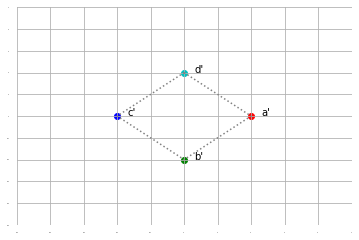

In [96]:
# create the rotation transformation matrix
T_r = np.array([[0, 1, 0], [-1, 0, 0], [0, 0, 1]])

fig = plt.figure()
ax = plt.gca()
for row in A:
    output_row = T_r @ row 
    x_r, y_r, i_r = output_row
    i_r = int(i_r) # convert float to int for indexing
    c_r = color_lut[i_r] # these are the same but, its good to be explicit
    letter_r = string.ascii_letters[i_r]
    plt.scatter(x_r, y_r, color=c_r)
    plt.text(x_r + 0.15, y_r, f"{letter_r}'")

plt.plot(xs, ys, color="gray", linestyle='dotted')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid()
plt.show()

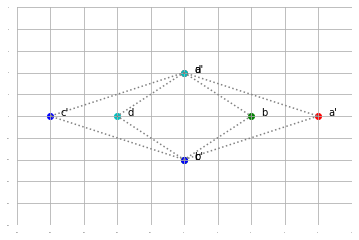

In [97]:
# create combined tranformation matrix
T = T_s @ T_r

fig = plt.figure()
ax = plt.gca()

xs_comb = []
ys_comb = []
for row in A:
    output_row = T @ row
    x, y, i = row
    x_comb, y_comb, i_comb = output_row
    xs_comb.append(x_comb)
    ys_comb.append(y_comb)
    i, i_comb = int(i), int(i_comb) # convert float to int for indexing
    c, c_comb = color_lut[i], color_lut[i_comb] # these are the same but, its good to be explicit
    letter, letter_comb = string.ascii_letters[i], string.ascii_letters[i_comb]
    plt.scatter(x, y, color=c)
    plt.scatter(x_comb, y_comb, color=c_comb)
    plt.text(x + 0.15 , y, f"{letter}")
    plt.text(x_comb + 0.15, y_comb, f"{letter_comb}'")
xs_comb.append(xs_comb[0])
ys_comb.append(ys_comb[0])
plt.plot(xs, ys, color="gray", linestyle='dotted')
plt.plot(xs_comb, ys_comb, color="gray", linestyle='dotted')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid()
plt.show()

In [57]:
img = plt.imread('letterR.jpg')
img.shape

(1000, 1000, 4)

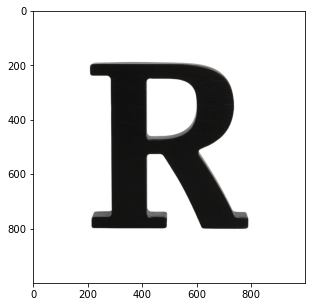

In [71]:
plt.figure(figsize=(5, 5))
plt.imshow(img)


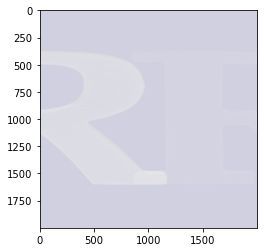

In [70]:
# 2x scaling requires a tranformation image array 2x the original image
img_transformed = np.empty((2000, 2000, 4), dtype=np.uint8)
for i, row in enumerate(img):
    for j, col in enumerate(row):
        pixel_data = img[i, j, :]
        input_coords = np.array([i, j, 1])
        i_out, j_out, _ = T @ input_coords
        img_transformed[i_out, j_out, :] = pixel_data


plt.imshow(img_transformed, cmap='gray')
plt.show()

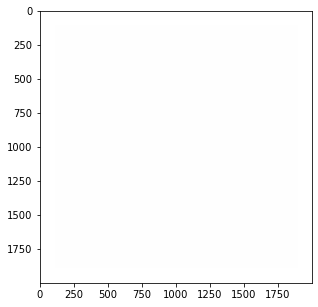

In [32]:
T_inv = np.linalg.inv(T)

# nearest neighbors interpolation
def nearest_neighbors(i, j, M, T_inv):
    x_max, y_max = M.shape[0] - 1, M.shape[1] - 1
    x, y, _ = T_inv @ np.array([i, j, 1])
    if np.floor(x) == x and np.floor(y) == y:
        x, y = int(x), int(y)
        return M[x, y]
    if np.abs(np.floor(x) - x) < np.abs(np.ceil(x) - x):
        x = int(np.floor(x))
    else:
        x = int(np.ceil(x))
    if np.abs(np.floor(y) - y) < np.abs(np.ceil(y) - y):
        y = int(np.floor(y))
    else:
        y = int(np.ceil(y))
    if x > x_max:
        x = x_max
    if y > y_max:
        y = y_max
    return M[x, y,]

img_nn = np.empty((2000, 2000, 4), dtype=np.uint8)
for i, row in enumerate(img_transformed):
    for j, col in enumerate(row):
        img_nn[i, j, :] = nearest_neighbors(i, j, img, T_inv)

plt.figure(figsize=(5, 5))
plt.imshow(img_nn)

In [15]:
T_pos1000 = np.array([
    [1, 0, 1000],
    [0, 1, 1000],
    [0, 0, 1]])
# rotate - opposite angle
T_rotate = np.array([
    [0, -1, 0],
    [1, 0, 0],
    [0, 0, 1]])
# scale
T_scale = np.array([
    [2, 0, 0],
    [0, 2, 0],
    [0, 0, 1]])
# center original to 0,0
T_neg500 = np.array([
    [1, 0, -500],
    [0, 1, -500],
    [0, 0, 1]])
T = T_pos1000 @ T_rotate @ T_scale @ T_neg500
T_inv = np.linalg.inv(T)

In [16]:
T_opencv = np.float32(T.flatten()[:6].reshape(2,3))

print(T)

[[   0   -2 2000]
 [   2    0    0]
 [   0    0    1]]


In [17]:
print(T_opencv)

[[   0.   -2. 2000.]
 [   2.    0.    0.]]


In [22]:
a = np.array([[1,2,3]])
print(a)
print(a.T)
print(a.dot(a.T))

[[1 2 3]]
[[1]
 [2]
 [3]]
[[14]]


In [72]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update({'image.cmap': 'Accent',
                     'image.interpolation': 'none',
                     'xtick.major.width': 0,
                     'xtick.labelsize': 0,
                     'ytick.major.width': 0,
                     'ytick.labelsize': 0,
                     'axes.linewidth': 0})


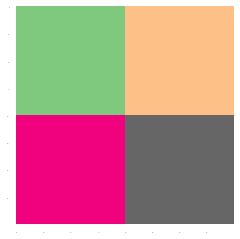

In [92]:
aux = np.ones((100, 100), dtype=int)
src = np.vstack([np.c_[aux, 2*aux], np.c_[3*aux, 4*aux]])
plt.imshow(src)
plt.show()

In [93]:
def linear_transformation(src, a):
    M, N = src.shape
    points = np.mgrid[0:N, 0:M].reshape((2, M*N))
    new_points = np.linalg.inv(a).dot(points).round().astype(int)
    x, y = new_points.reshape((2, M, N), order='F')
    indices = x + N*y
    return np.take(src, indices, mode='wrap')

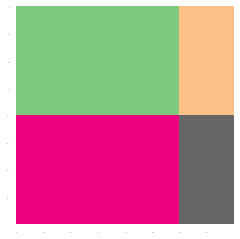

In [94]:
a = np.array([[1.5, 0],
              [0, 1]])
dst = linear_transformation(src, a)
plt.imshow(dst)
plt.show()

In [101]:
import numpy as np
from scipy import misc

p1 = [(450,68),(527,99),(603,130),(543,312),(483,494),(423,443),(363,393),(406,230)]
p2 = [(364,96),(443,96),(522,96),(522,253),(522,411),(443,411),(364,411),(364,253)]
p1 = [(448,67),(602,129),(362,392),(483,494)]
p2 = [(386,78),(552,78),(386,453),(552,453)]

pointsTotal = len(p1)

im = plt.imread("img.jpg")

for i in range(4):
        im[p1[i][0]-2:p1[i][0]+3,p1[i][1]-2:p1[i][1]+3,:] = [255,0,0]
        im[p2[i][0]-2:p2[i][0]+3,p2[i][1]-2:p2[i][1]+3,:] = [0,255,0]

misc.imsave("or.png",im)

A = np.zeros((8,9))
# Homography matrix
for i in range(4): # Using the corners
        A[i*2,:] = [ p1[i][1], p1[i][0], 1, 0, 0, 0, -p2[i][1]*p1[i][1], -p2[i][1]*p1[i][0], -p2[i][1] ]
        A[i*2+1,:] = [0, 0, 0, p1[i][1], p1[i][0], 1, -p2[i][0]*p1[i][1], -p2[i][0]*p1[i][0], -p2[i][0] ]


# Alternative (provide worse results)
#[V,W] = np.linalg.eig(np.dot(A.T,A))
#m = W[:,-1]

[U,S,V]=np.linalg.svd(A)
m = V[-1,:]
H = np.reshape(m,(3,3))


# It should be close to zero
print("This value should be close to zero: "+str(np.sum(np.dot(A,m))))

H = np.reshape(m,(3,3))

# This part will will calculate the X and Y offsets
bunchX=[]; bunchY=[]

tt = np.array([[1],[1],[1]])
tmp = np.dot(H,tt)
bunchX.append(tmp[0]/tmp[2])
bunchY.append(tmp[1]/tmp[2])

tt = np.array([[im.shape[1]],[1],[1]])
tmp = np.dot(H,tt)
bunchX.append(tmp[0]/tmp[2])
bunchY.append(tmp[1]/tmp[2])

tt = np.array([[1],[im.shape[0]],[1]])
tmp = np.dot(H,tt)
bunchX.append(tmp[0]/tmp[2])
bunchY.append(tmp[1]/tmp[2])

tt = np.array([[im.shape[1]],[im.shape[0]],[1]])
tmp = np.dot(H,tt)
bunchX.append(tmp[0]/tmp[2])
bunchY.append(tmp[1]/tmp[2])

refX1 = int(np.min(bunchX))
refX2 = int(np.max(bunchX))
refY1 = int(np.min(bunchY))
refY2 = int(np.max(bunchY))

# Final image whose size is defined by the offsets previously calculated
final = np.zeros((int(refY2-refY1),int(refX2-refX1),3))

# Iterate over the imagine to transform every pixel
for i in range(im.shape[0]):
        for j in range(im.shape[1]):

                tt = np.array([[j],[i],[1]])
                tmp = np.dot(H,tt)
                x1=int(tmp[0]/tmp[2])-refX1
                y1=int(tmp[1]/tmp[2])-refY1

                if x1>0 and y1>0 and y1<refY2-refY1 and x1<refX2-refX1:
                        final[y1,x1,:]=im[i,j,:]

misc.imsave("_tmp_final.png",final)
# Simple Interpolation
# Interpolate empty pixels from the original image, ignoring pixels outside (extrapolating)
Hi = np.linalg.inv(H)
for i in range(final.shape[0]):
        for j in range(final.shape[1]):
                if sum(final[i,j,:])==0:
                        tt = np.array([[j+refX1],[i+refY1],[1]])
                        tmp = np.dot(Hi,tt)
                        x1=int(tmp[0]/tmp[2])
                        y1=int(tmp[1]/tmp[2])

                        if x1>0 and y1>0 and x1<im.shape[1] and y1<im.shape[0]:
                                final[i,j,:] = im[y1,x1,:]


misc.imsave("final.png",final)

FileNotFoundError: [Errno 2] No such file or directory: 'img.jpg'

In [37]:
# rotation angle ....
import numpy as np
m  =np.abs((116/216) - (28/339)) /(1+ (116*28/(216*339)))
print(np.rad2deg(np.arctan(m)))

23.51576852219777


In [2]:
import numpy as np
A = np.array([[141,131,1,0,0,0],[0,0,0,141,131,1],[480,159,1,0,0,0],[0,0,0,480,159,1],[493,630,1,0,0,0],[0,0,0,493,630,1]])
#b = np.array([141,131,480,159,493,630])
b = np.array([318, 256, 534, 372, 316, 670])
np.linalg.solve(A,b)

array([  0.67694046,  -0.48152914, 285.63171275,   0.29058724,
         0.62467594, 133.19465177])

In [3]:
x1, y1, x2, y2, x3, y3, x4, y4 = 141,131,480,159,493,630,64,601
x1_, y1_, x2_, y2_, x3_, y3_, x4_, y4_ = 318, 256, 534, 372, 316, 670, 73, 473

A = np.array([[x1,y1,1,0,0,0, -x1*x1_, -y1*x1_],
[0,0,0,x1,y1,1, -x1*y1_, -y1*y1_],
[x2,y2,1,0,0,0, -x2*x2_, -y2*x2_],
[0,0,0,x2,y2,1, -x2*y2_, -y2*y2_],
    [x3,y3,1,0,0,0, -x3*x3_, -y3*x3_],
    [0,0,0,x3,y3,1, -x3*y3_, -y3*y3_], 
    [x4, y4, 1, 0,0, 0, -x4*x4_, -y4*x4_], 
    [0,0,0,x4, y4, 1, -x4*y4_, -y4*y4_]])
b = np.array([x1_, y1_, x2_, y2_, x3_, y3_, x4_, y4])
H = np.linalg.solve(A,b)
H

array([ 8.27987641e-01, -3.96142853e-01,  2.80826460e+02,  3.56049396e-01,
        1.05840374e+00,  8.94278081e+01,  1.50736669e-04,  5.02166996e-04])